In [61]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt


In [79]:
house_num=100
np.random.seed(42)
#random datas are given
house_size=np.random.randint(low=300,high=1500,size=house_num)
house_prize=house_size*100+np.random.randint(low=20000,high=80000,size=house_num)



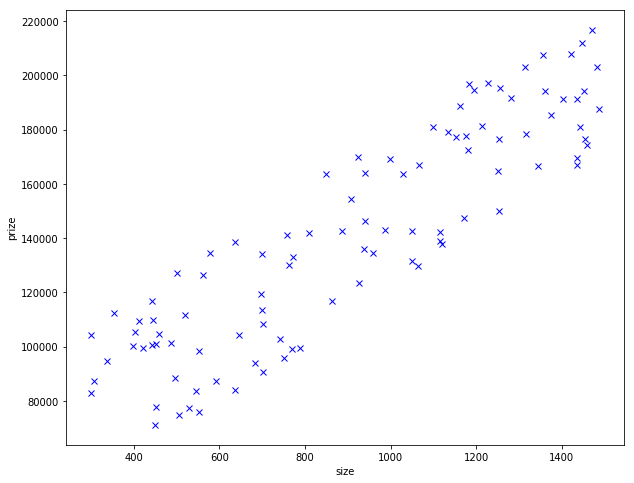

In [63]:
plt.plot(house_size,house_prize,"bx")
plt.xlabel("size")
plt.ylabel("prize")
plt.show()

In [64]:
def normalize(array):#to normalize all features
    return(array-array.mean())/array.std()

In [65]:
train_samples=math.ceil(house_num*0.7)#70% trai data
train_data_size=np.array(house_size[:train_samples])
train_data_prize=np.array(house_prize[:train_samples])

test_data_size=np.array(house_size[train_samples:])
test_data_prize=np.array(house_prize[train_samples:])
print(test_data_size,test_data_prize)

[ 927  886  403  553 1435  809  398  452 1213 1177  637 1121 1486 1256
  460 1100  697 1115 1458  700  939 1356  987  759 1254  769 1345 1049
  337  529] [123429 142777 105317  76084 191251 141764 100128  77733 181411 177674
 138448 137901 187790 195289 104754 180993 119292 142147 174516 113355
 135909 207702 143076 140991 150180  99268 166539 131555  94641  77395]


In [66]:
train_data_size_norm=normalize(train_data_size)
train_data_prize_norm=normalize(train_data_prize)

test_data_size_norm=normalize(test_data_size)
test_data_prize_norm=normalize(test_data_prize)

#placeholder>>used to pass data in graph
#variable>>values adjusted in graph(constantly changing)

In [67]:
tf_house_size=tf.placeholder("float",name="house_size")#to store data in future code
tf_house_prize=tf.placeholder("float",name='house_prize')

In [68]:
tf_size_factor=tf.Variable(np.random.randn(),name="size_factor")
tf_prize_offset=tf.Variable(np.random.randn(),name="prize_offset")



In [69]:
# y=theta0+x*theta1......as in coursera
tf_prize_pre=tf.add(tf.multiply(tf_size_factor,tf_house_size),tf_prize_offset)

In [70]:
#cost function (1/2m)*sum(pre_prize-actual_prize)^2
tf_cost=tf.reduce_sum(tf.pow(tf_prize_pre-tf_house_prize,2)/(2*train_samples))


In [71]:
#Gradient descent(in tensorflow it is already exist as a library coolll
learning_rate=0.1
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

cost= 0.38405037 size_factor= 0.21882506 prize_offset -0.33507815
cost= 0.2897247 size_factor= 0.34197426 prize_offset -0.27423692
cost= 0.2265653 size_factor= 0.4427607 prize_offset -0.22443686
cost= 0.18427801 size_factor= 0.5252452 prize_offset -0.18367447
cost= 0.155968 size_factor= 0.59275126 prize_offset -0.15030949
cost= 0.13701758 size_factor= 0.6479991 prize_offset -0.122999474
cost= 0.12433433 size_factor= 0.69321424 prize_offset -0.10064565
cost= 0.115847126 size_factor= 0.7302185 prize_offset -0.08234852
cost= 0.11016899 size_factor= 0.76050335 prize_offset -0.06737193
cost= 0.10637124 size_factor= 0.7852886 prize_offset -0.05511325
cost= 0.10383197 size_factor= 0.8055734 prize_offset -0.04507928
cost= 0.10213486 size_factor= 0.8221745 prize_offset -0.036866248
cost= 0.101001166 size_factor= 0.8357611 prize_offset -0.030143669
cost= 0.10024431 size_factor= 0.84688044 prize_offset -0.024641125
cost= 0.09973941 size_factor= 0.8559806 prize_offset -0.02013716
cost= 0.09940291 

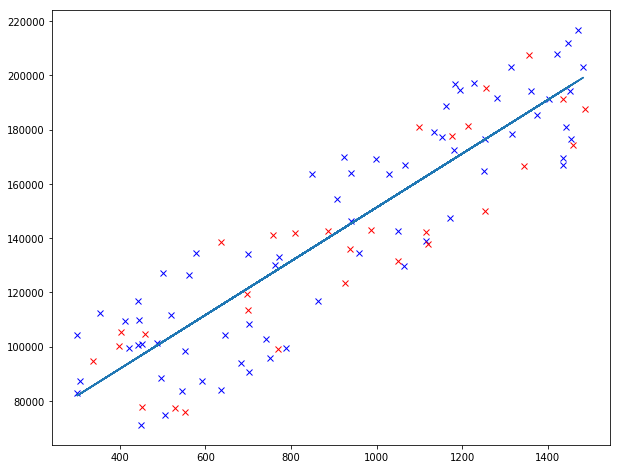

In [73]:
#we didn't give datas for size_factor,prize_offset..... so we initializeas global and this values takecare by the optimizer
init=tf.global_variables_initializer()
#run graph as session bec session allocates memory for variables in real time but graph simply plots the data
with tf.Session() as sess:
    sess.run(init)
    display_every=2
    iter_num=50
    
    for iteration in range(iter_num):
        
        #in this we just giving data from ..._norm to tf_house_size & ...norm to ...prize simultaneously by zip
        #zip pass both x & y data @ same time
        for (x,y) in zip(train_data_size_norm,train_data_prize_norm):
            sess.run(optimizer,feed_dict={tf_house_size : x,tf_house_prize: y })
               
        
        if(iteration+1)%display_every==0:#to display every second iteration(2,4,6....)
            #in this we run cost function in session 
            
            c=sess.run(tf_cost,feed_dict={tf_house_size:train_data_size_norm,tf_house_prize:train_data_prize_norm})
            print("cost=",c,"size_factor=",sess.run(tf_size_factor),"prize_offset",sess.run(tf_prize_offset))
    #to store the last trained value
    training_cost=sess.run(tf_cost,feed_dict={tf_house_size:train_data_size_norm,tf_house_prize:train_data_prize_norm})
    print("training_cost=",training_cost,"size_factor=",sess.run(tf_size_factor),"prize_offset",sess.run(tf_prize_offset))
    
    
    train_data_size_mean=train_data_size.mean()
    train_data_size_std=train_data_size.std()

    train_data_prize_mean=train_data_prize.mean()
    train_data_prize_std=train_data_prize.std()
    
    plt.plot(train_data_size,train_data_prize,"bx",label="Training data")
    plt.plot(test_data_size,test_data_prize,"rx",label="Testing data")

    
    
    plt.plot(train_data_size_norm*train_data_size_std+train_data_size_mean,
             (sess.run(tf_size_factor)*train_data_size_norm+sess.run(tf_prize_offset))*train_data_prize_std+train_data_prize_mean)
    
    plt.show()

            
